In [1]:
import pandas as pd
import numpy as np
from numpy import argmax

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection, metrics
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score, matthews_corrcoef, brier_score_loss, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\vegek\OneDrive\Documents\Python Scripts\pima-indians-diabetes.csv")

In [3]:
df2 = df.copy()

In [4]:
df2.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df2.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
X = df2.drop('class', axis=1)
y = df2['class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('class', axis=1), df2['class'], test_size=0.30, random_state=101)

In [8]:
#!pip install xgboost

In [9]:
from xgboost import XGBClassifier
import xgboost as xgb

In [10]:
#!pip install hyperopt

In [11]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [12]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [13]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [14]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

build_posterior_wrapper took 0.000899 seconds
TPE using 0 trials


SCORE:                                                
0.6493506493506493                                    
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

build_posterior_wrapper took 0.001993 seconds
TPE using 1/1 trials with best loss -0.649351


SCORE:                                                
0.6493506493506493                                                               
 10%|█         | 1/10 [00:00<00:00, 14.16trial/s, best loss: -0.6493506493506493]

C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

build_posterior_wrapper took 0.001993 seconds
TPE using 2/2 trials with best loss -0.649351


SCORE:                                                                           
0.6493506493506493                                                               
 20%|██        | 2/10 [00:00<00:00, 21.37trial/s, best loss: -0.6493506493506493]

C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

build_posterior_wrapper took 0.001993 seconds
TPE using 3/3 trials with best loss -0.649351


SCORE:                                                                           
0.6493506493506493                                                               
 40%|████      | 4/10 [00:00<00:00, 34.05trial/s, best loss: -0.6493506493506493]

C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

build_posterior_wrapper took 0.001993 seconds
TPE using 4/4 trials with best loss -0.649351


SCORE:                                                                           
0.6493506493506493                                                               
 40%|████      | 4/10 [00:00<00:00, 34.05trial/s, best loss: -0.6493506493506493]

C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

build_posterior_wrapper took 0.002990 seconds
TPE using 5/5 trials with best loss -0.649351


SCORE:                                                                           
0.6493506493506493                                                               
 50%|█████     | 5/10 [00:00<00:00, 34.05trial/s, best loss: -0.6493506493506493]

C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

build_posterior_wrapper took 0.001993 seconds
TPE using 6/6 trials with best loss -0.649351
C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

SCORE:                                                                           
0.6493506493506493                                                               
 60%|██████    | 6/10 [00:00<00:00, 34.05trial/s, best loss: -0.6493506493506493]

build_posterior_wrapper took 0.001993 seconds
TPE using 7/7 trials with best loss -0.649351


SCORE:                                                                           
0.6493506493506493                                                               
 70%|███████   | 7/10 [00:00<00:00, 34.05trial/s, best loss: -0.6493506493506493]

C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

build_posterior_wrapper took 0.001993 seconds
TPE using 8/8 trials with best loss -0.649351
C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

SCORE:                                                                           
0.6493506493506493                                                               
 90%|█████████ | 9/10 [00:00<00:00, 38.45trial/s, best loss: -0.6493506493506493]

build_posterior_wrapper took 0.001993 seconds
TPE using 9/9 trials with best loss -0.649351
C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                           
0.6493506493506493                                                               
100%|██████████| 10/10 [00:00<00:00, 38.17trial/s, best loss: -0.6493506493506493]


In [15]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9348052040828857, 'gamma': 5.391549119378258, 'max_depth': 15.0, 'min_child_weight': 9.0, 'reg_alpha': 129.0, 'reg_lambda': 0.9822898009671374}


In [16]:
algo = []
tr_acc = []
te_acc = []
tr_pre = []
te_pre = []
tr_rec = []
te_rec = []
tr_f1 = []
te_f1 = []
tr_roc = []
te_roc = []
tr_mcc = []
te_mcc = []
tr_bri = []
te_bri = []

In [17]:
model = XGBClassifier(random_state = 101, objective='binary:logistic', eta=0.025, gamma=1.3, n_estimators=4700, max_depth=11,
                     subsample=0.6, eval_metic='auc', early_stopping_rounds=50, seed=101)

model.fit(X_train, y_train)

algo.append('Model:1')
tr_acc.append(model.score(X_train, y_train))
te_acc.append(model.score(X_test, y_test))
tr_pre.append(precision_score(y_train, model.predict(X_train)))
te_pre.append(precision_score(y_test, model.predict(X_test)))
tr_rec.append(recall_score(y_train, model.predict(X_train)))
te_rec.append(recall_score(y_test, model.predict(X_test)))
tr_f1.append(f1_score(y_train, model.predict(X_train)))
te_f1.append(f1_score(y_test, model.predict(X_test)))
tr_roc.append(roc_auc_score(y_train, model.predict(X_train)))
te_roc.append(roc_auc_score(y_test, model.predict(X_test)))
tr_mcc.append(matthews_corrcoef(y_train, model.predict(X_train)))
te_mcc.append(matthews_corrcoef(y_test, model.predict(X_test)))
tr_bri.append(brier_score_loss(y_train, model.predict(X_train)))
te_bri.append(brier_score_loss(y_test, model.predict(X_test)))


C:\Users\vegek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eval_metic" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
results = pd.DataFrame()
results['Model'] = algo
results['Tr_Acc'] = tr_acc
results['Te_Acc'] = te_acc
results['Tr_Pre'] = tr_pre
results['Te_Pre'] = te_pre
results['Tr_Rec'] = tr_rec
results['Te_Rec'] = te_rec
results['Tr_F1'] = tr_f1
results['Te_F1'] = te_f1
results['Tr_ROC'] = tr_roc
results['Te_ROC'] = te_roc
results['Tr_MCC'] = tr_mcc
results['Te_MCC'] = te_mcc
results['Tr_Bri'] = tr_bri
results['Te_Bri'] = te_bri
results = results.set_index('Model')
results

,Tr_Acc,Te_Acc,Tr_Pre,Te_Pre,Tr_Rec,Te_Rec,Tr_F1,Te_F1,Tr_ROC,Te_ROC,Tr_MCC,Te_MCC,Tr_Bri,Te_Bri
Model,,,,,,,,,,,,,,
Model:1,0.998138,0.744589,1.0,0.630952,0.994652,0.654321,0.997319,0.642424,0.997326,0.723827,0.995901,0.444051,0.001862,0.255411


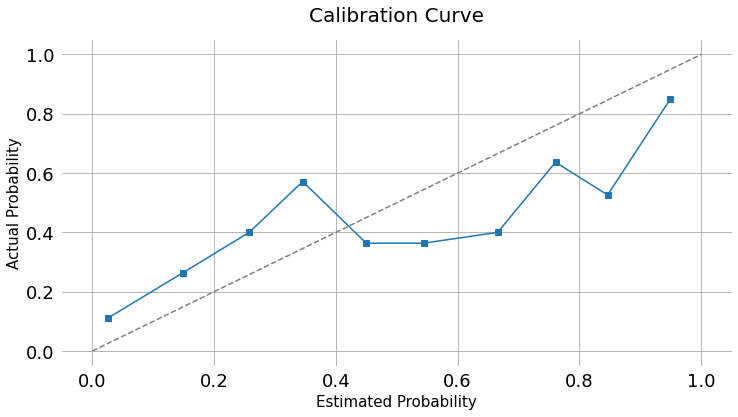

In [27]:
#Calibration curve
from sklearn.calibration import calibration_curve
y_test_predict_proba = model.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

fig, ax = plt.subplots(1, figsize=(12,6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.box(False)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.xlabel('Estimated Probability', fontsize=15)
plt.ylabel('Actual Probability', fontsize=15)
plt.title('Calibration Curve', fontsize = 20)
plt.show()

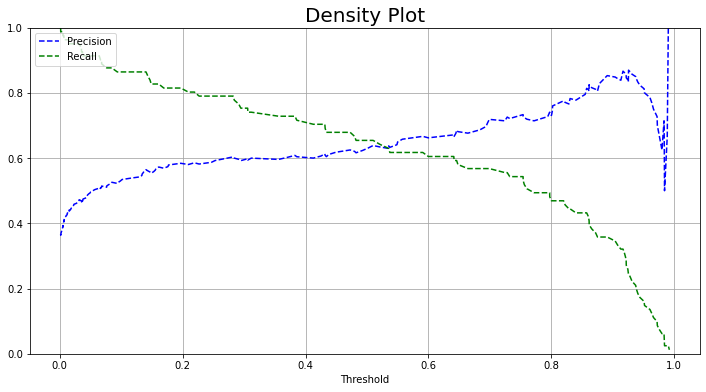

In [20]:
#Precision_Recall_Threshold
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(12,6))
probas_pred = model.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, probas_pred[:,1], pos_label=1, sample_weight=None)

plt.title('Density Plot', fontsize=20)
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'g--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [21]:
algo.append('Model:1 Thres 0.6')
tr_acc.append(model.score(X_train, y_train))
te_acc.append(model.score(X_test, y_test))
tr_pre.append(precision_score(y_train, (model.predict_proba(X_train)[:,1] >= 0.6)))
te_pre.append(precision_score(y_test, (model.predict_proba(X_test)[:,1] >= 0.6)))
tr_rec.append(recall_score(y_train,(model.predict_proba(X_train)[:,1] >= 0.6)))
te_rec.append(recall_score(y_test, (model.predict_proba(X_test)[:,1] >= 0.6)))
tr_f1.append(f1_score(y_train, (model.predict_proba(X_train)[:,1] >= 0.6)))
te_f1.append(f1_score(y_test,(model.predict_proba(X_test)[:,1] >= 0.6)))
tr_roc.append(roc_auc_score(y_train, (model.predict_proba(X_train)[:,1] >= 0.6)))
te_roc.append(roc_auc_score(y_test, (model.predict_proba(X_test)[:,1] >= 0.6)))
tr_mcc.append(matthews_corrcoef(y_train, (model.predict_proba(X_train)[:,1] >= 0.6)))
te_mcc.append(matthews_corrcoef(y_test, (model.predict_proba(X_test)[:,1] >= 0.6)))
tr_bri.append(brier_score_loss(y_train, (model.predict_proba(X_train)[:,1] >= 0.6)))
te_bri.append(brier_score_loss(y_test, (model.predict_proba(X_test)[:,1] >= 0.6)))


In [22]:
results = pd.DataFrame()
results['Model'] = algo
results['Tr_Acc'] = tr_acc
results['Te_Acc'] = te_acc
results['Tr_Pre'] = tr_pre
results['Te_Pre'] = te_pre
results['Tr_Rec'] = tr_rec
results['Te_Rec'] = te_rec
results['Tr_F1'] = tr_f1
results['Te_F1'] = te_f1
results['Tr_ROC'] = tr_roc
results['Te_ROC'] = te_roc
results['Tr_MCC'] = tr_mcc
results['Te_MCC'] = te_mcc
results['Tr_Bri'] = tr_bri
results['Te_Bri'] = te_bri
results = results.set_index('Model')
results

,Tr_Acc,Te_Acc,Tr_Pre,Te_Pre,Tr_Rec,Te_Rec,Tr_F1,Te_F1,Tr_ROC,Te_ROC,Tr_MCC,Te_MCC,Tr_Bri,Te_Bri
Model,,,,,,,,,,,,,,
Model:1,0.998138,0.744589,1.0,0.630952,0.994652,0.654321,0.997319,0.642424,0.997326,0.723827,0.995901,0.444051,0.001862,0.255411
Model:1 Thres 0.6,0.998138,0.744589,1.0,0.671233,0.983957,0.604938,0.991914,0.636364,0.991979,0.722469,0.987722,0.456665,0.005587,0.242424


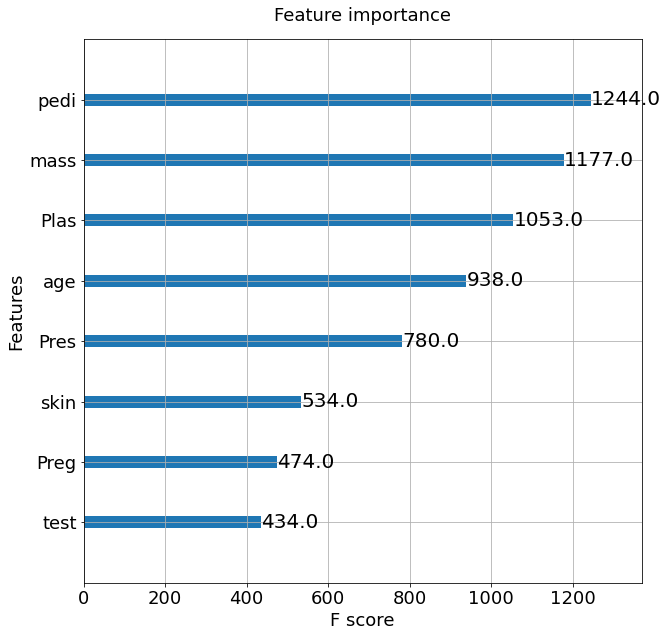

In [23]:
from xgboost import plot_importance
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30
plt.rcParams.update({'font.size':20})
size = 18
params = {'legend.fontsize': 'large',
          'figure.figsize': (10,10),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size,
          'ytick.labelsize': size,
          'axes.titlepad' : size}
plt.rcParams.update(params)

plot_importance(model)
plt.show()

In [24]:
def crp(model, output):
    z = pd.DataFrame()                                               # creating a new dataframe
    z['Actual'] = y_test.values                                      # Storing actual output of target variable

    z['Probaility that output is 0'] = model.predict_proba(X_test)[:,0]
    # Probabilities predicted by Logistic regression model
    z['Probaility that output is 1'] = model.predict_proba(X_test)[:,1]

    z['Predicted'] = model.predict(X_test)                               # Predicting target variable using sklearn Logistic regression

    # In sklearn default threshold is 0.5
    # therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1
    
    cf_matrix = confusion_matrix(z['Actual'], z['Predicted'])
    group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(10,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size":25})
    plt.ylabel('Actual label', fontsize = 15)
    plt.xlabel('Predicted label',fontsize = 15)
    

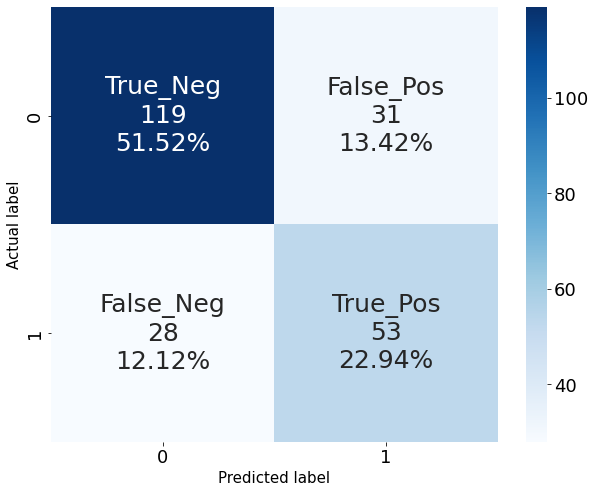

In [25]:
model_df = crp(model, 'model')
model_df